In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\surya\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Importing Competition Data

In [2]:
train = pd.read_csv("E:/Kaggle/Abalone Dataset/train.csv")
test = pd.read_csv("E:/Kaggle/Abalone Dataset/test.csv")
sample_submission = pd.read_csv("E:/Kaggle/Abalone Dataset/sample_submission.csv")

In [3]:
train.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

### Importing Original Data

In [4]:
og = pd.read_csv("E:/Kaggle/Abalone Dataset/Original/abalone.data", header=None)

In [5]:
og.head()

0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

### Exploring OG and train data 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [7]:
og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
og = og.rename(columns = dict(zip([0,1,2,3,4,5,6,7,8],train.columns[1:])))

In [9]:
train.describe()

id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.001000        0.000500      0.001500      1.000000  
25%          0.177500        0.086500      0.120000      8.000000  
50%          0.330000        0.166000      0.225000      9.000000  
75%          0.463000        0.232500      0.305000     11.000000  
max          1.488000        0.760000      1.005000     29.000000

1. From the initial description, we have except for Gender all are integer/float varaibles
2. Looks like none of them have null values, and maybe very few or none of the columns have outliers.
3. Looks like all the probable feature are all within the range of 0 to 3. Will check later on need for normalization/Standardization.

Rings
1        25
2        29
3       386
4      1402
5      2862
6      5411
7      9008
8     14499
9     17465
10    12464
11     8407
12     4719
13     4074
14     2507
15     2072
16     1439
17     1175
18      848
19      639
20      507
21      255
22      108
23      180
24       29
25       22
26       18
27       41
29       24
Name: count, dtype: int64

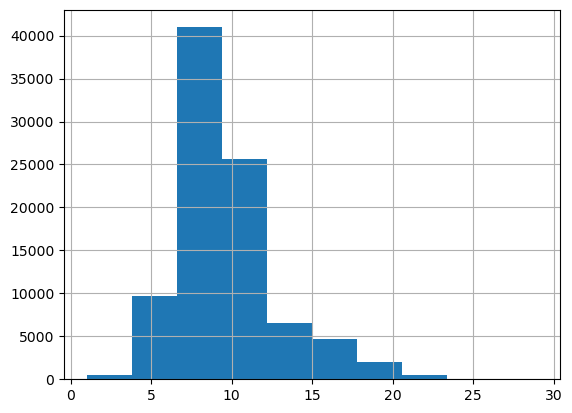

In [10]:
display(train.Rings.value_counts().sort_index())
train.Rings.hist()
plt.show()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

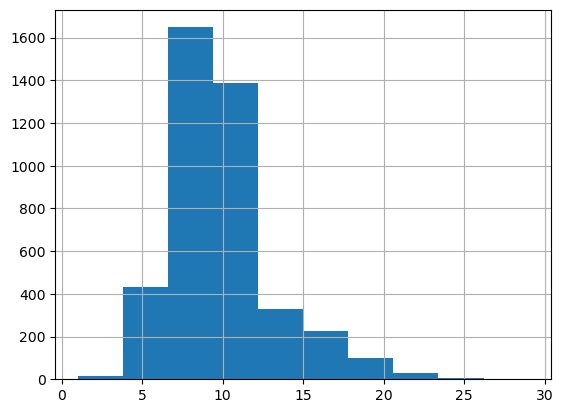

In [11]:
display(og.Rings.unique())
og.Rings.hist()
plt.show()

1. looks like a preety normally distrbuted maybe slighlt right skewed dataset with the mean around 7.5.
2. The max and min value are 1 and 29. Surpsingly both in og and in the train data there is no ring 28. 

In [12]:
numerical_variables = list(train.drop(columns=['Sex','id']).columns)
cat_variables = ['Sex']

c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

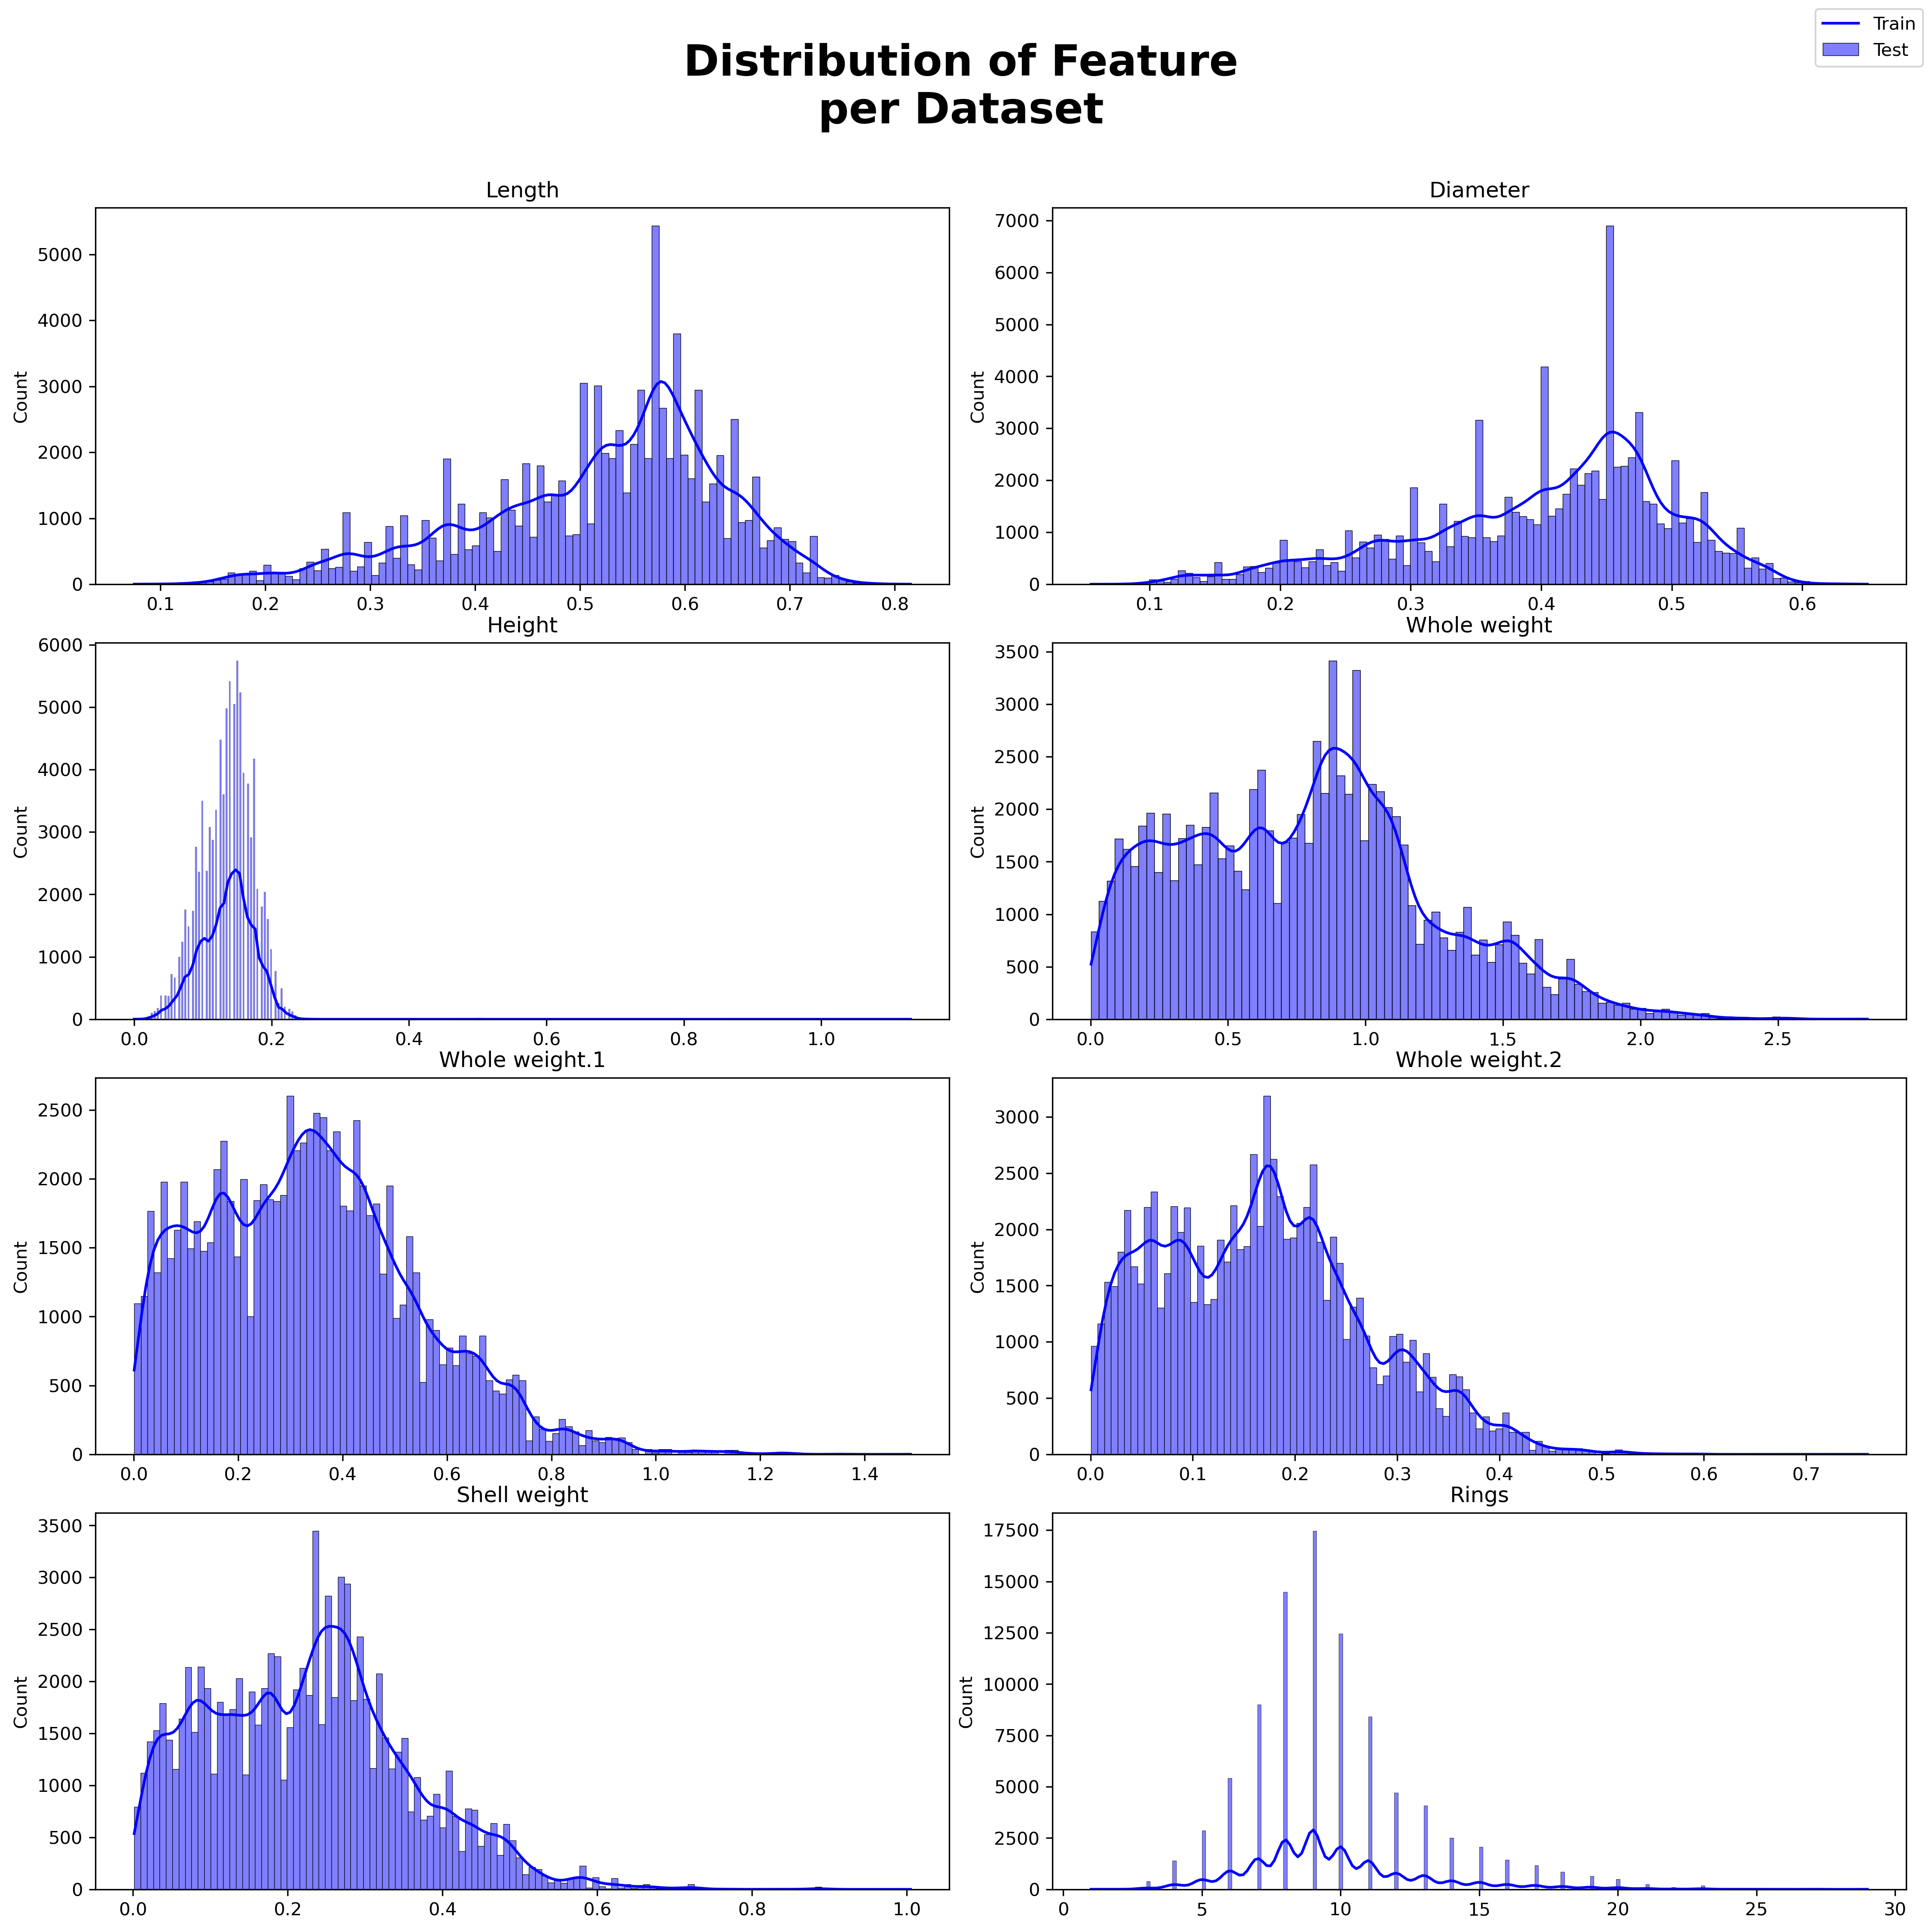

In [13]:
fig, ax = plt.subplots(4,2, figsize=(15,15), dpi=300) 
ax = ax.flatten()
for i, col in enumerate(numerical_variables):
    sns.histplot(train[col],ax=ax[i],color='b',kde=True)
    # sns.histplot(og[col],ax=ax[i],color='g',kde=True)    
    ax[i].set_title(f'{col}')
    ax[i].set_xlabel(None)    
    
for j in range(len(numerical_variables),len(ax)):
    ax[j].axis('off')
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout(h_pad=0.1, w_pad=0.5)
plt.show()

In [14]:
# train['Whole weight'] = train['Whole weight'].apply(lambda x : np.log1p(x))
# train['Whole weight.1'] = train['Whole weight.1'].apply(lambda x : np.log1p(x))
# train['Whole weight.2'] = train['Whole weight.2'].apply(lambda x : np.log1p(x))
# train['Shell weight'] = train['Shell weight'].apply(lambda x : np.log1p(x))
# train['Rings'] = train['Rings'].apply(lambda x: np.log1p(x))

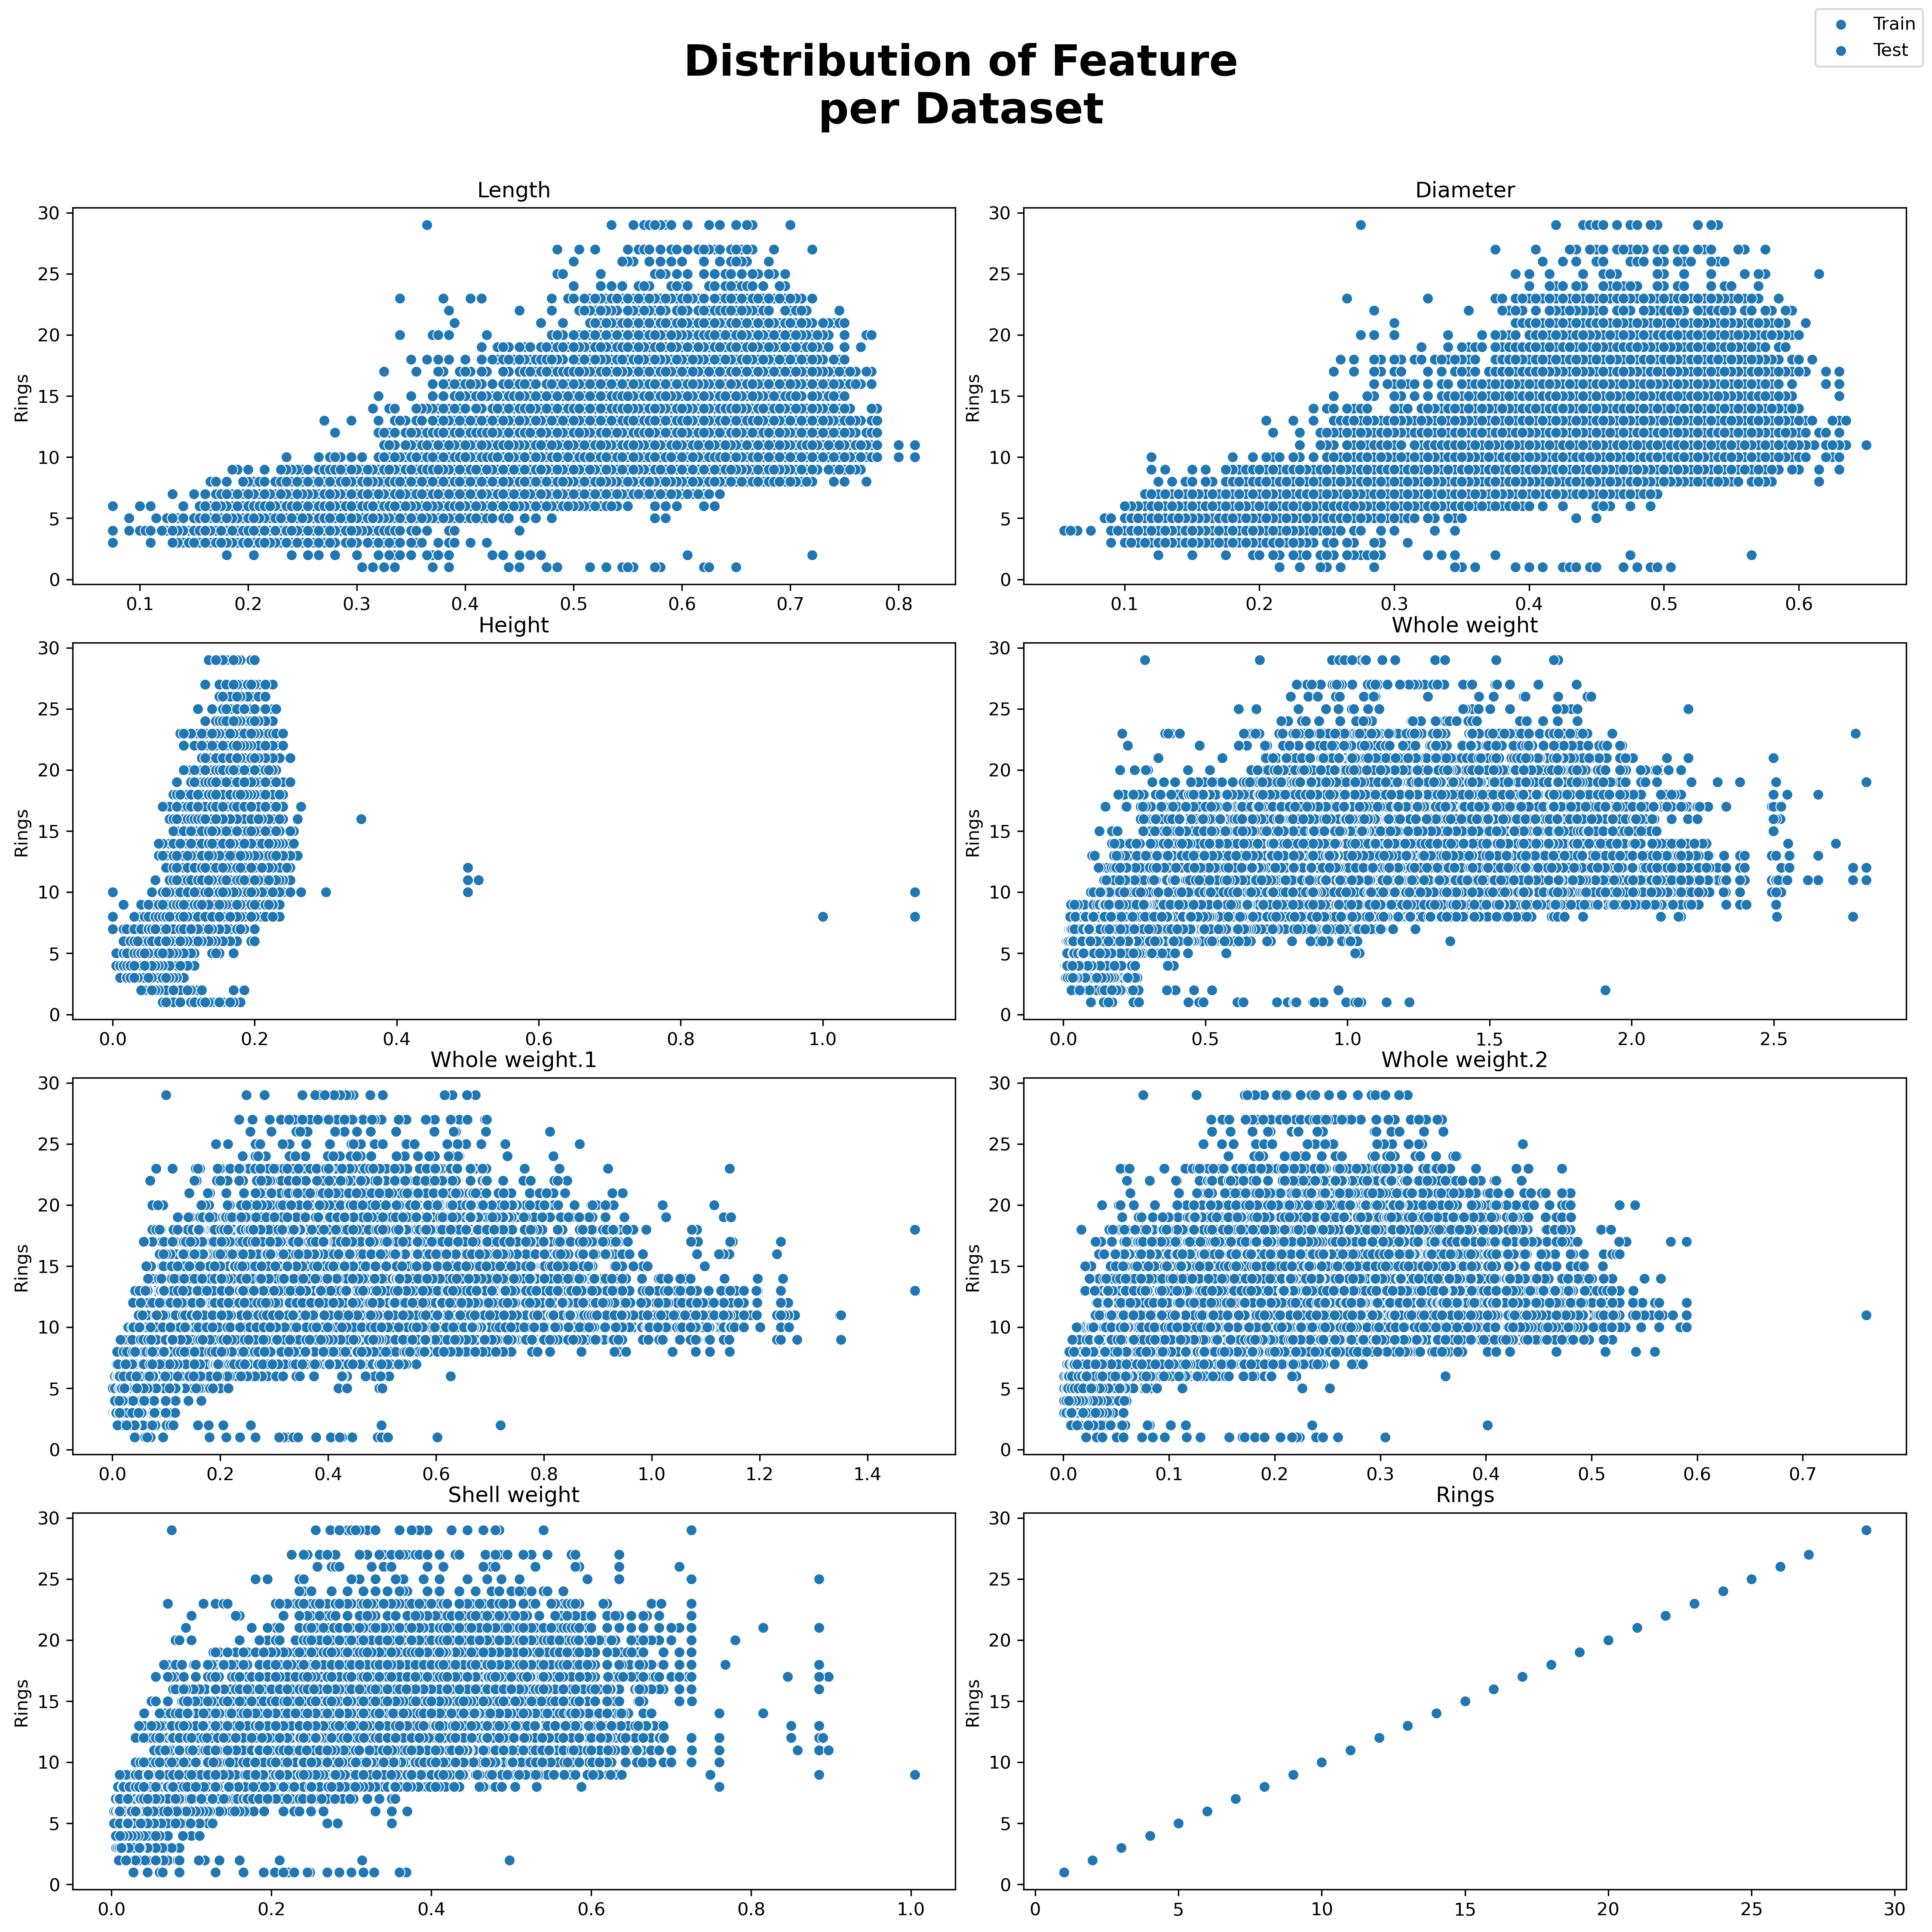

In [15]:
fig, ax = plt.subplots(4,2, figsize=(15,15), dpi=300) 
ax = ax.flatten()
for i, col in enumerate(numerical_variables):
    sns.scatterplot(train, x= col, y='Rings',ax=ax[i])
    # sns.histplot(og[col],ax=ax[i],color='g',kde=True)    
    ax[i].set_title(f'{col}')
    ax[i].set_xlabel(None)    
    
for j in range(len(numerical_variables),len(ax)):
    ax[j].axis('off')
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout(h_pad=0.1, w_pad=0.5)
plt.show()

c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

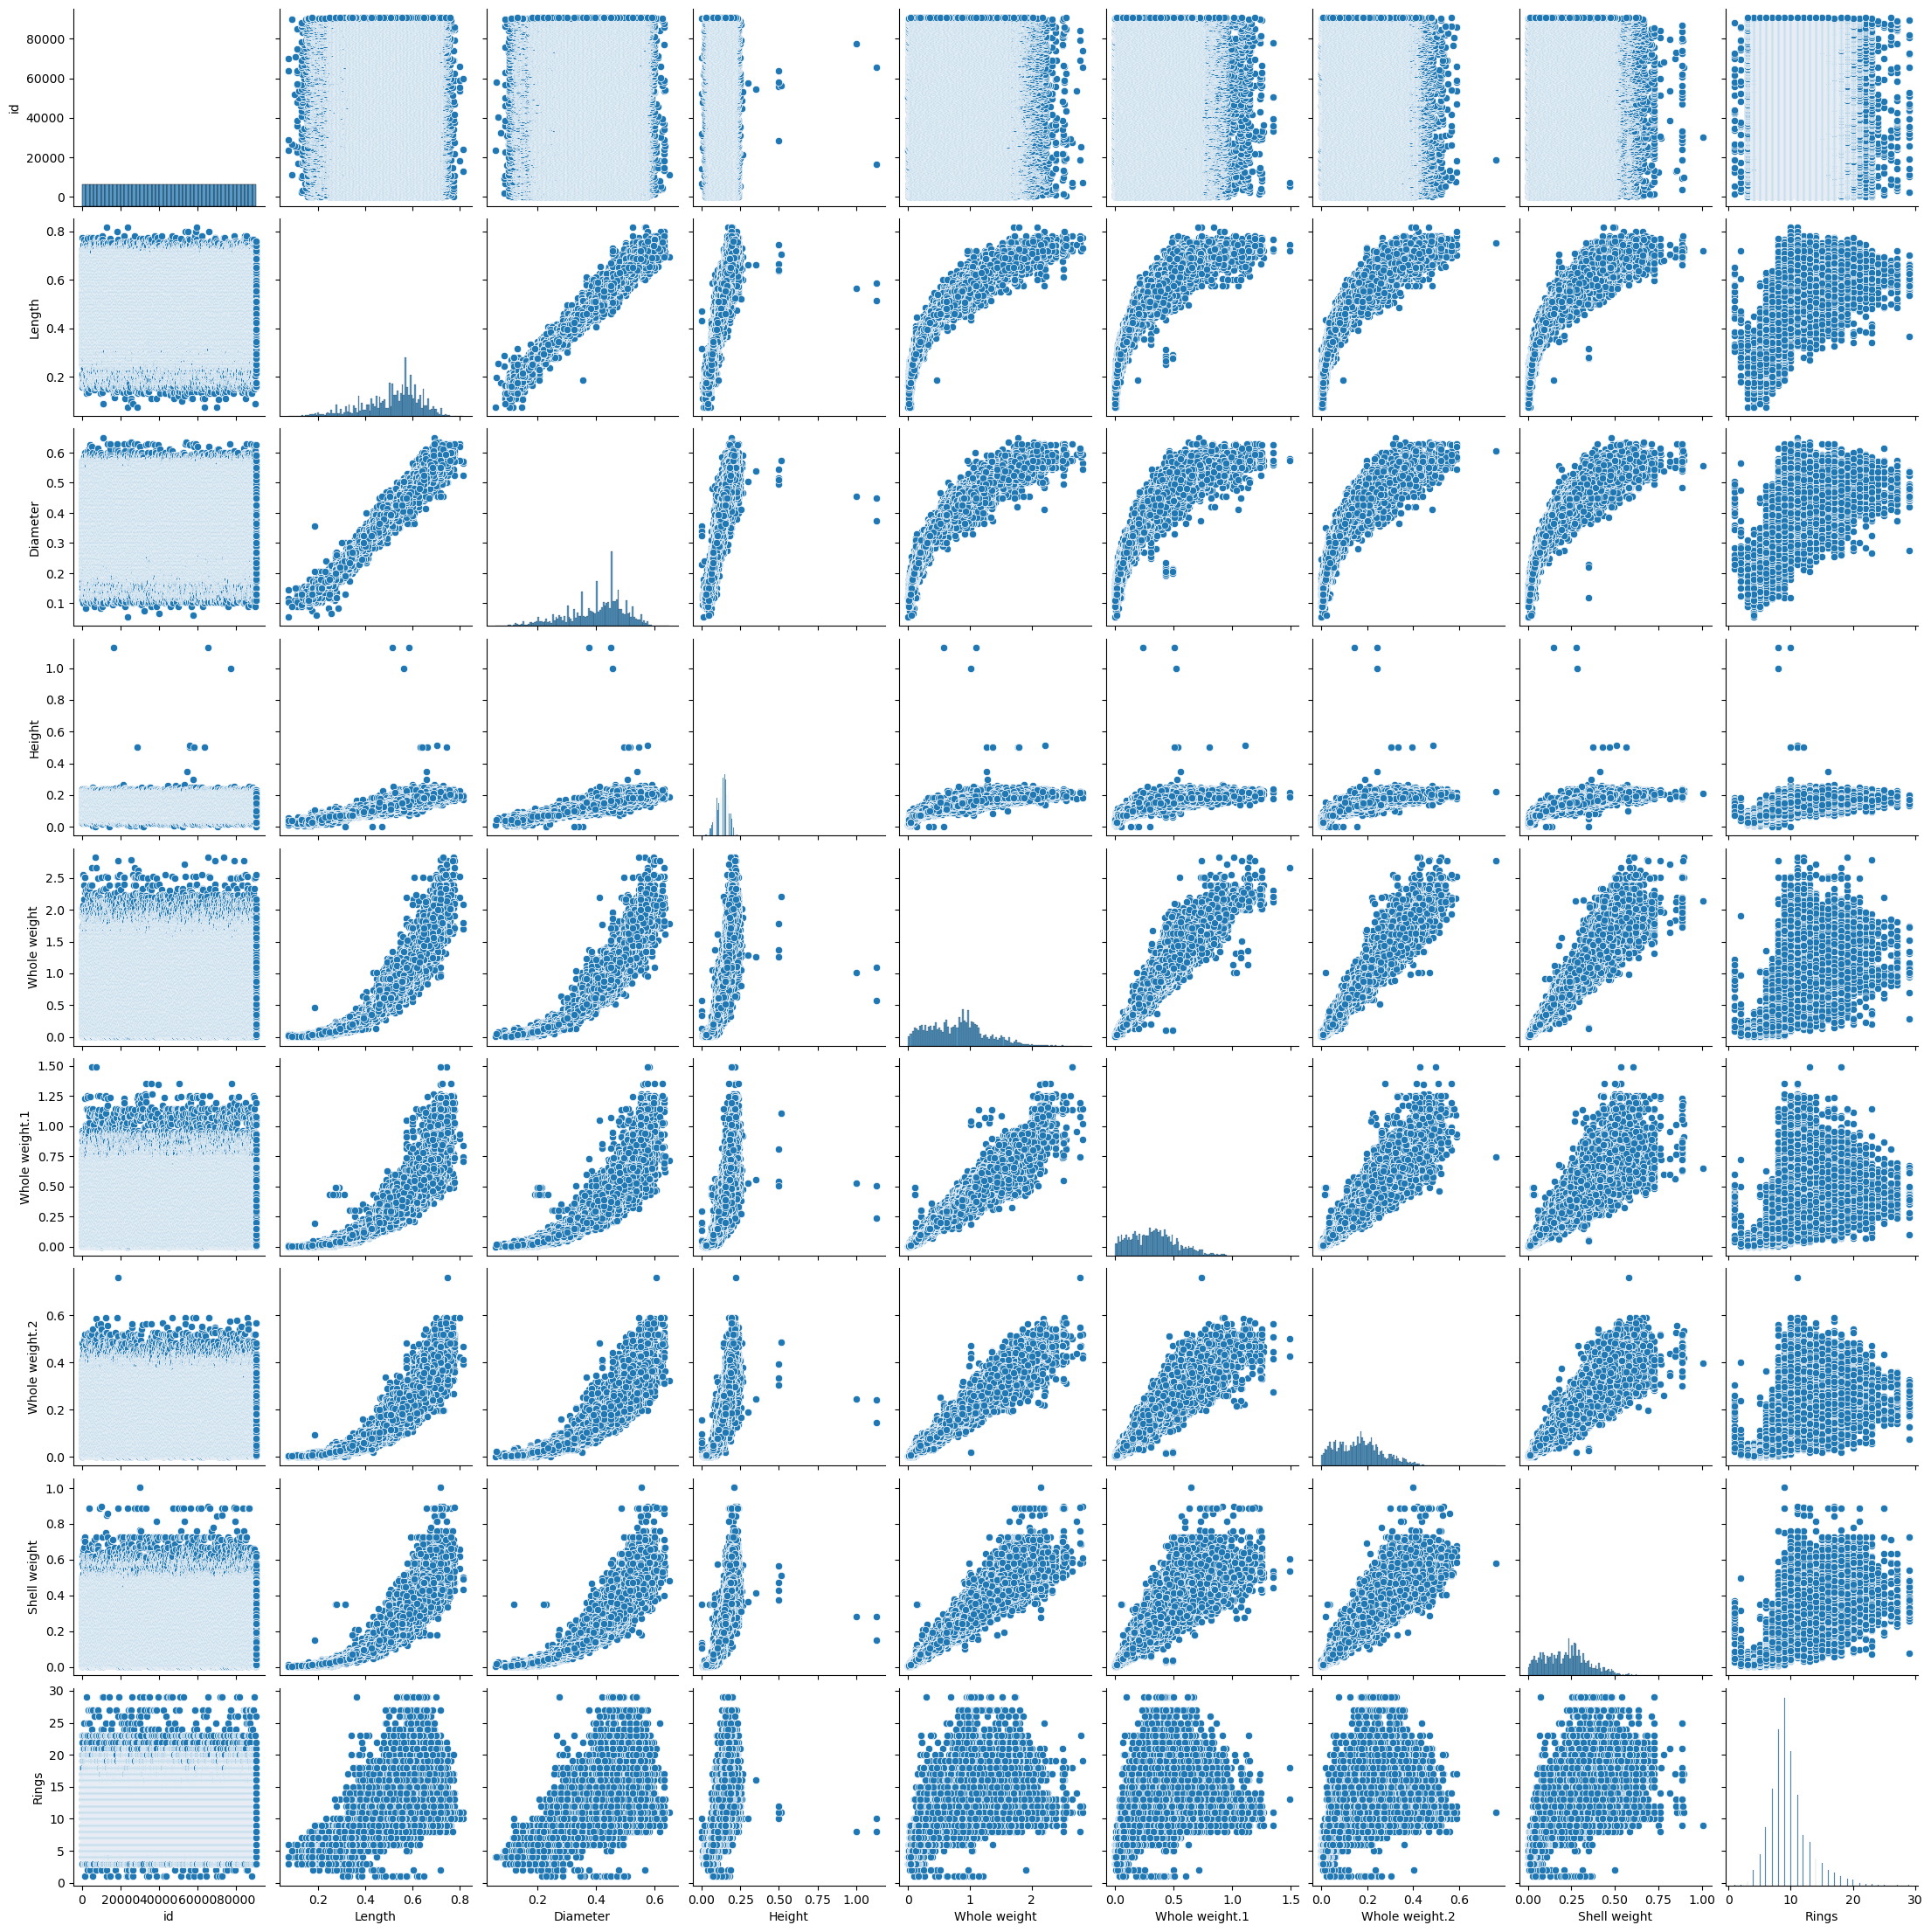

In [16]:
sns.pairplot(train)

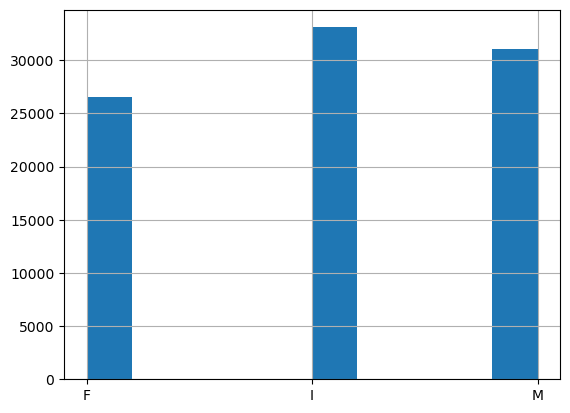

In [17]:
train.Sex.hist()
plt.show()

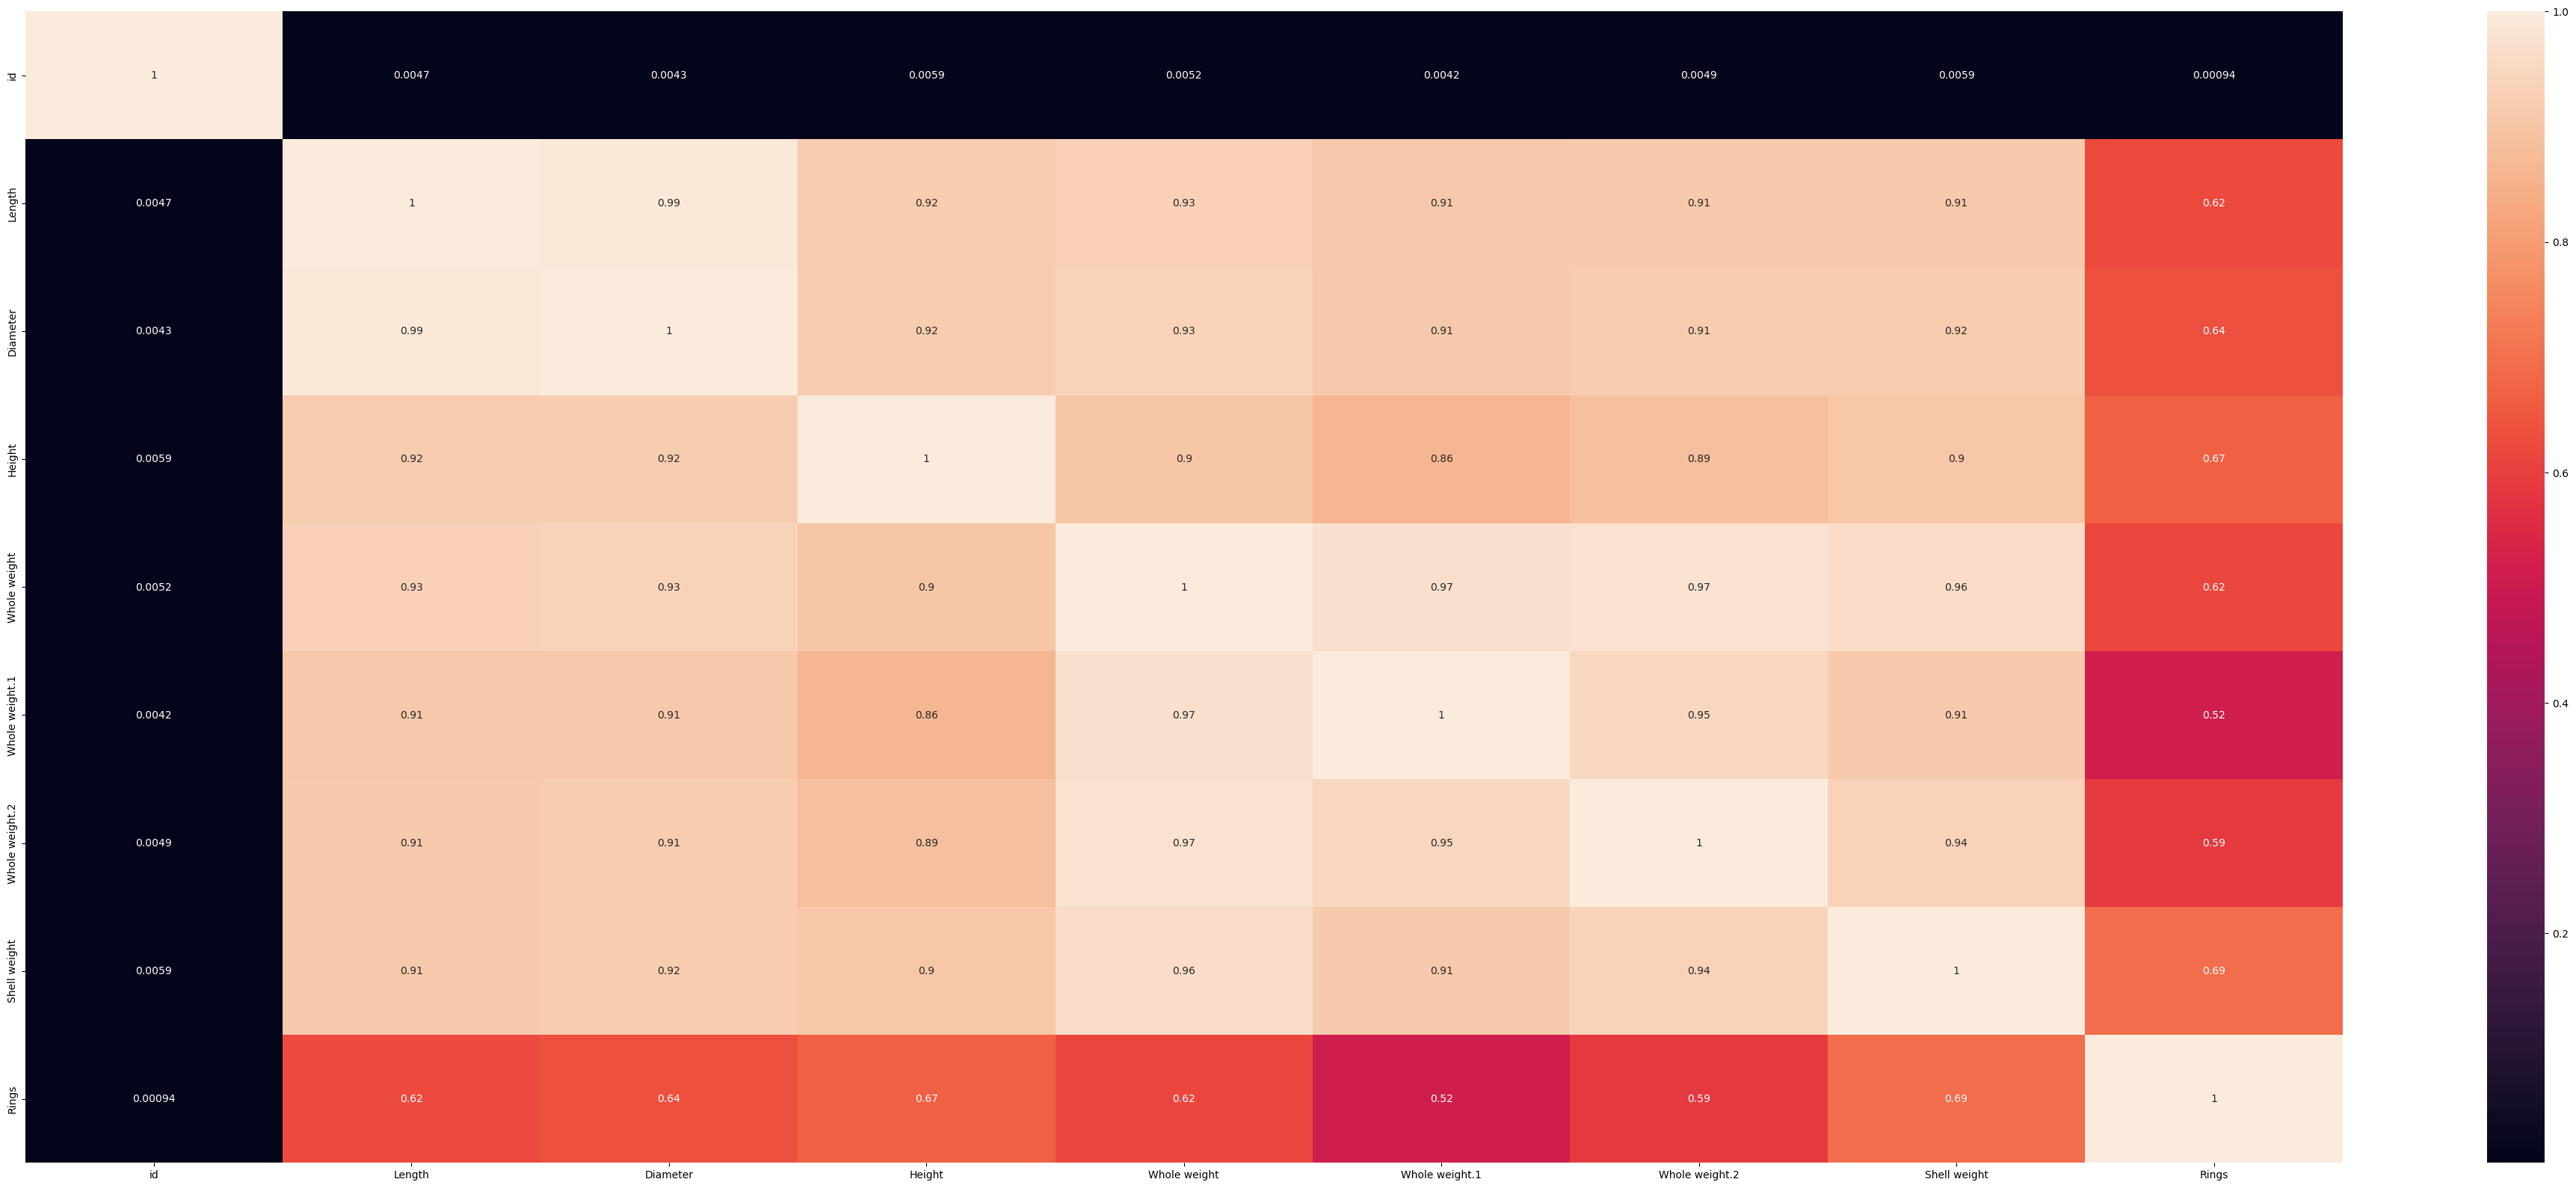

In [107]:
sns.heatmap(train.drop(columns=['Sex']).corr(), annot=True)
plt.show()

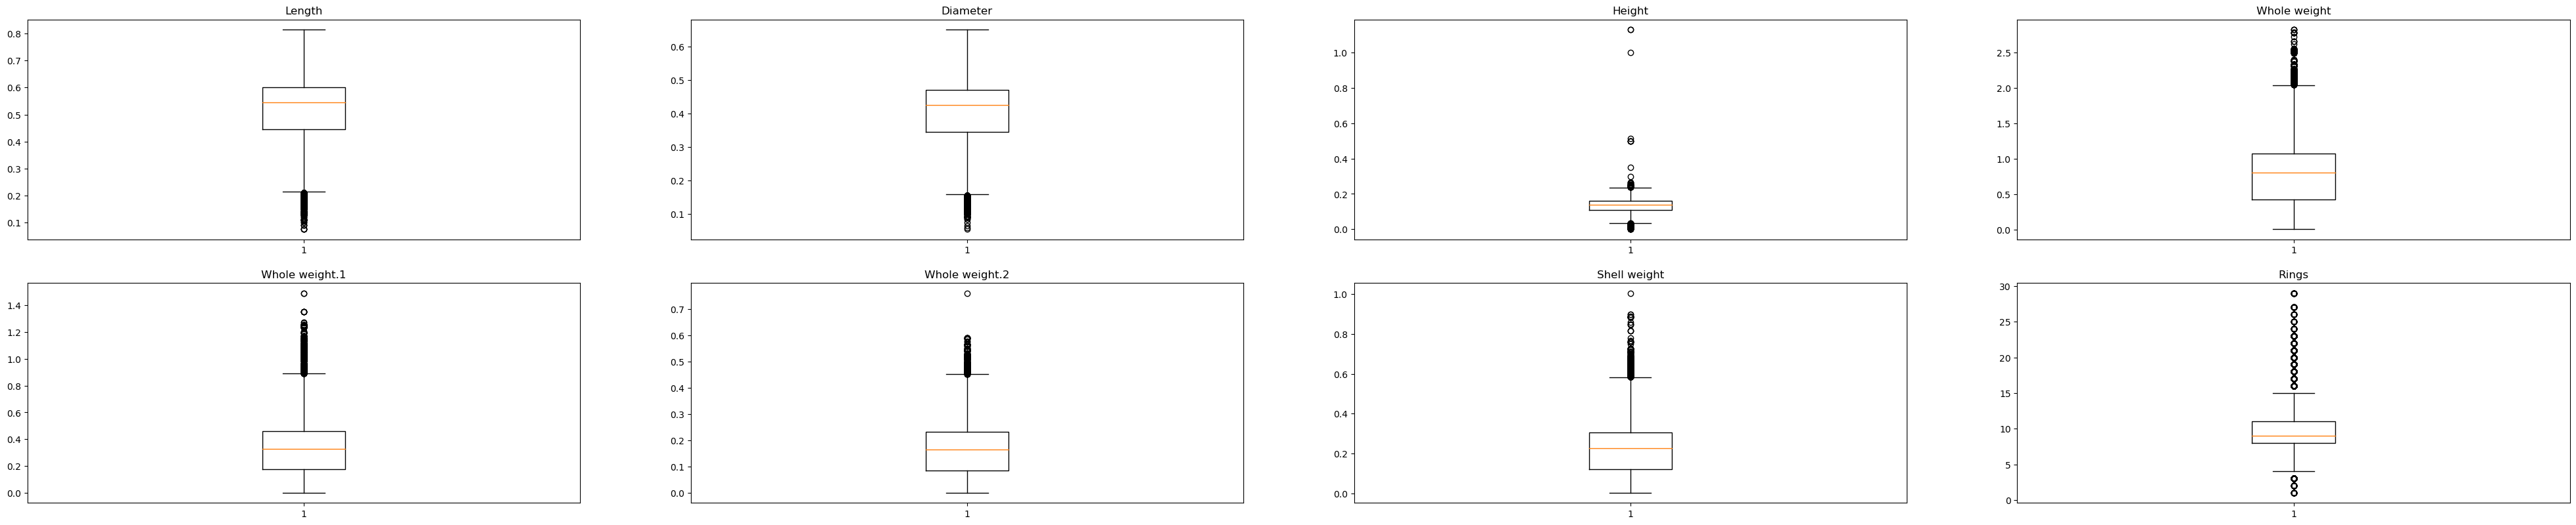

In [108]:
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in numerical_variables:
  plt.subplot(4,4,c)
  plt.title(f"{i}")
  plt.boxplot(train[i])
  c+=1
plt.show()

In [109]:
outlier_index = []

for col in train.drop(columns=['Sex']).columns:
    q1 = np.percentile(train[col], 25)
    q3 = np.percentile(train[col], 75)
    iqr_threshold = (q3-q1)*1.5
    outlier_index += list(train[(train[col] > q3+iqr_threshold) | (train[col] < q1-iqr_threshold)].index)

outlier_index = set(outlier_index)
print(outlier_index)
print(len(outlier_index))


{2, 32774, 8, 32784, 65553, 65559, 32792, 65561, 27, 28, 29, 65570, 36, 37, 65582, 65587, 65593, 65594, 32827, 62, 65604, 65606, 79, 83, 65624, 65626, 93, 107, 111, 32880, 65647, 65651, 65660, 124, 65667, 32902, 65672, 32917, 150, 65687, 153, 32924, 32927, 65697, 32931, 32936, 32940, 32945, 32949, 65719, 65725, 65728, 32963, 65744, 65747, 32992, 32993, 65763, 65770, 240, 253, 65791, 33037, 65806, 65810, 33051, 65821, 289, 33060, 65829, 293, 65837, 303, 65841, 33075, 33079, 65855, 65856, 321, 33092, 65860, 325, 327, 65864, 65874, 65877, 33110, 349, 33121, 361, 65897, 33131, 367, 33139, 375, 33149, 382, 386, 33154, 33156, 390, 33162, 65936, 401, 65941, 65948, 65950, 33184, 33187, 33197, 65968, 65972, 437, 440, 65980, 446, 65987, 455, 33224, 65991, 66001, 66008, 33241, 33247, 66017, 66018, 497, 33268, 501, 66037, 66042, 33276, 33280, 33281, 66056, 66060, 33294, 66073, 539, 33307, 33312, 66081, 66082, 33319, 558, 33328, 33331, 33332, 66101, 66110, 576, 33344, 578, 583, 66123, 66126, 66130,

<Axes: xlabel='Sex', ylabel='Rings'>

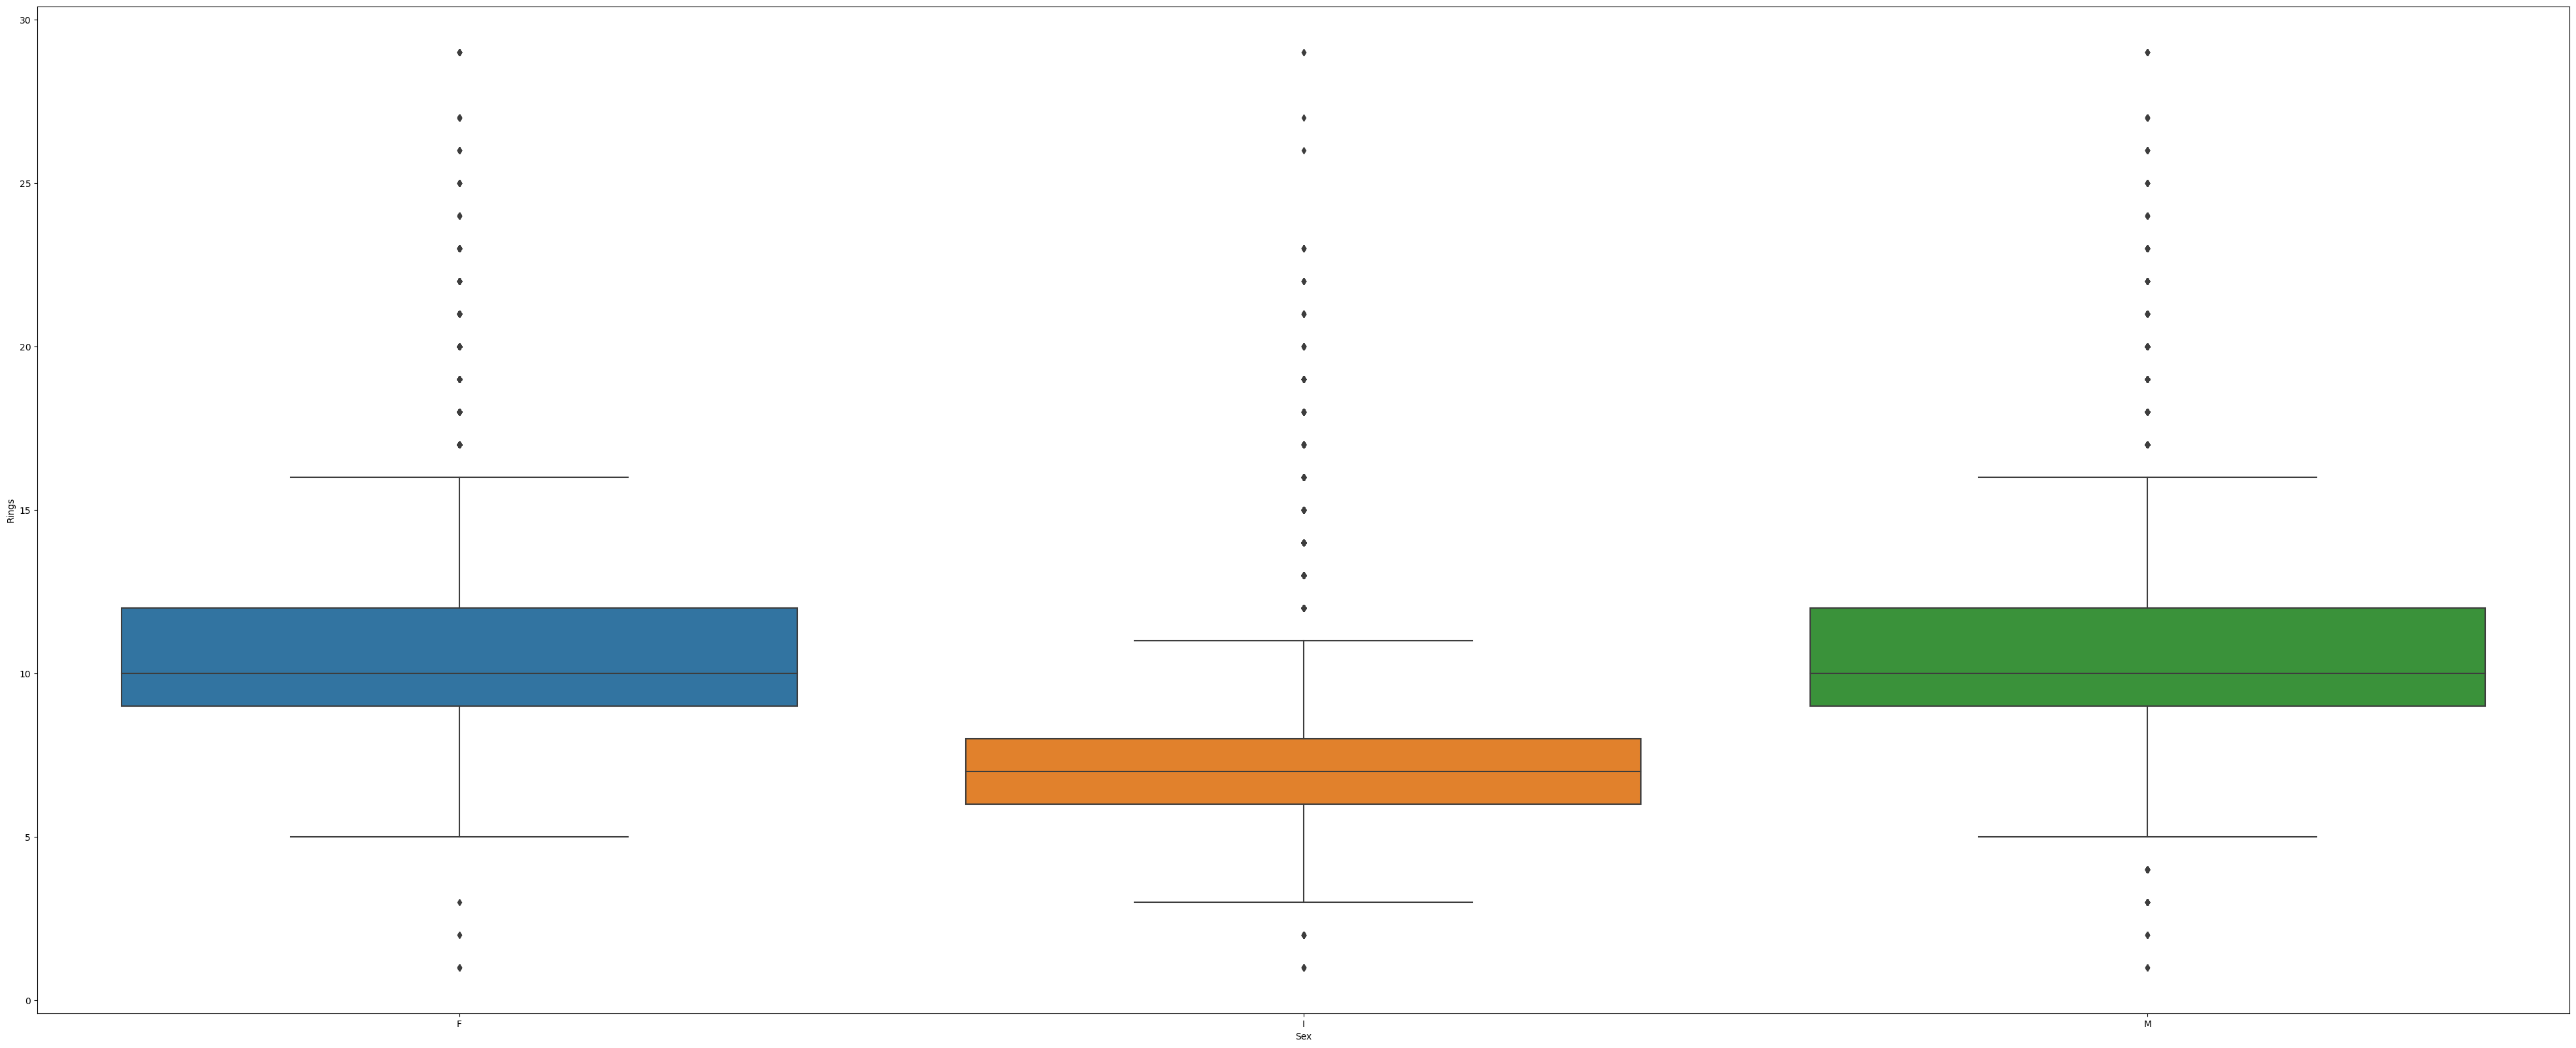

In [110]:
sns.boxplot(train, x='Sex', y='Rings')

c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\surya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rings', ylabel='Count'>

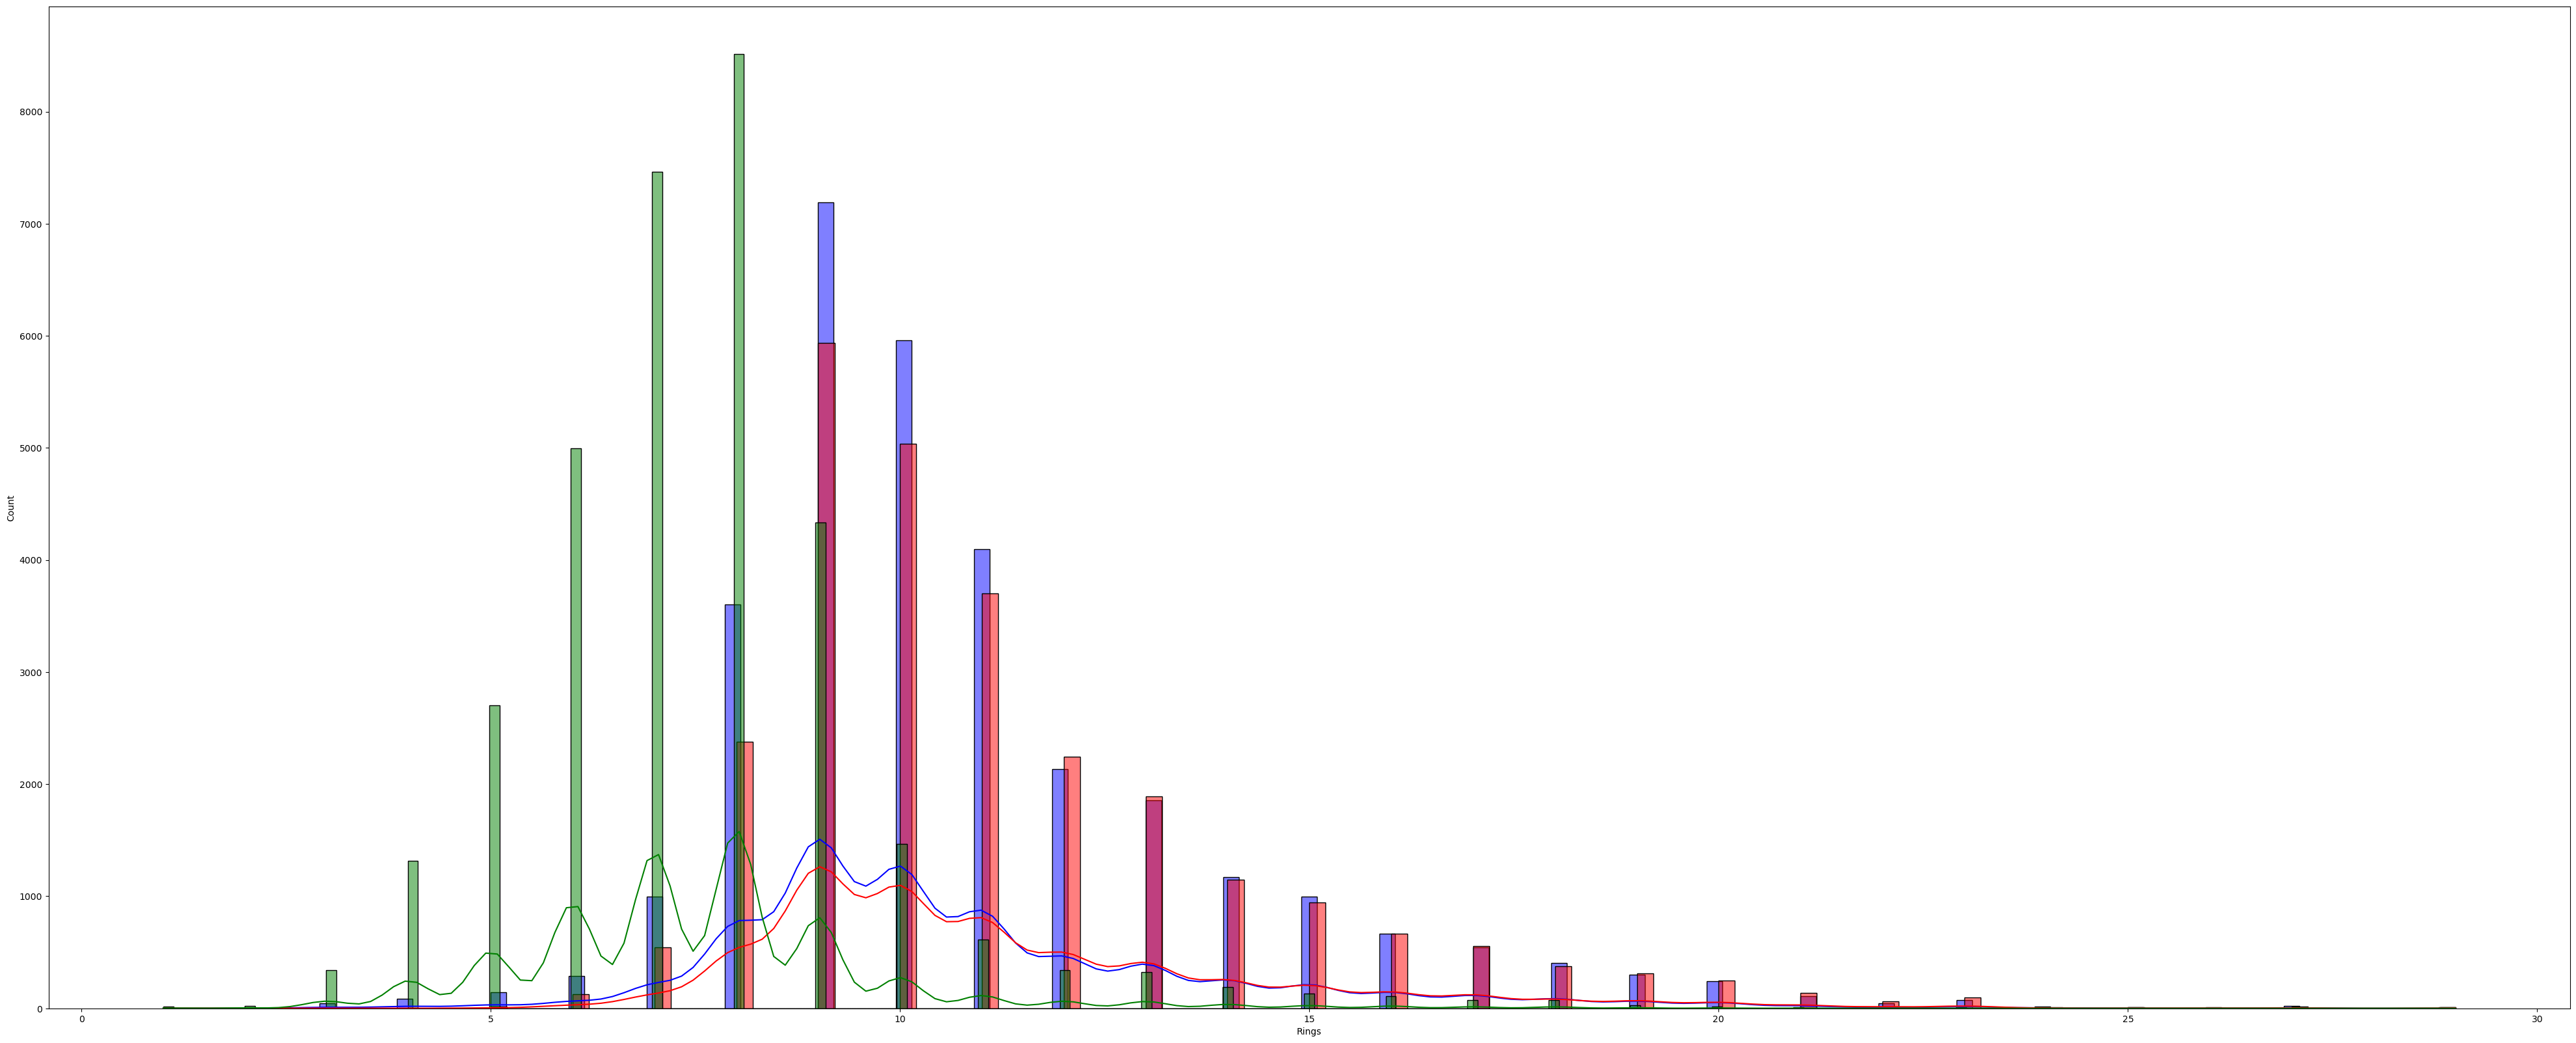

In [111]:
sns.histplot(train[train.Sex=='M']['Rings'],color='b',kde=True)
sns.histplot(train[train.Sex=='F']['Rings'],color='r',kde=True)
sns.histplot(train[train.Sex=='I']['Rings'],color='g',kde=True)


In [112]:
from scipy import stats
x=list(train[train.Sex=='F'].Rings)
y=list(train[train.Sex=='M'].Rings)
f = stats.f_oneway(x,y)
print(f)

F_onewayResult(statistic=264.4137196628665, pvalue=2.541099280019716e-59)


1. all of them are normally distributed/ bi modal but most of the variables are right skewed except for Diameter and Length.
2. The Correlation between features is very high and needs to be taken care of.
3. In the sex feature, the Infant clearly stands out as the differentiater and most contributing.The Anova shows some varianve present between Male and Female groups too.
4. There are 8K outliers in the dataset using the IQR method

In [137]:
train_sub = train[train.Rings>=25]

In [120]:
train_sub.describe()

id       Length     Diameter       Height  Whole weight  \
count   1184.000000  1184.000000  1184.000000  1184.000000   1184.000000   
mean   44088.679899     0.614345     0.488754     0.177927      1.279627   
std    26001.762774     0.061541     0.053293     0.023514      0.357887   
min       27.000000     0.340000     0.265000     0.095000      0.200000   
25%    21848.750000     0.575000     0.455000     0.165000      1.000125   
50%    43192.000000     0.620000     0.485000     0.175000      1.257750   
75%    65760.250000     0.660000     0.530000     0.195000      1.539000   
max    90586.000000     0.775000     0.615000     0.250000      2.788500   

       Whole weight.1  Whole weight.2  Shell weight        Rings  
count     1184.000000     1184.000000   1184.000000  1184.000000  
mean         0.473715        0.259302      0.425029    21.560811  
std          0.152957        0.079063      0.123193     2.063576  
min          0.070500        0.036500      0.070000    20.000000  
25%          0.359500        0.197000      0.330000    20.000000  
50%          0.463500        0.251000      0.420000    21.000000  
75%          0.583500        0.314250      0.510000    23.000000  
max          1.144500        0.541000      0.885000    29.000000

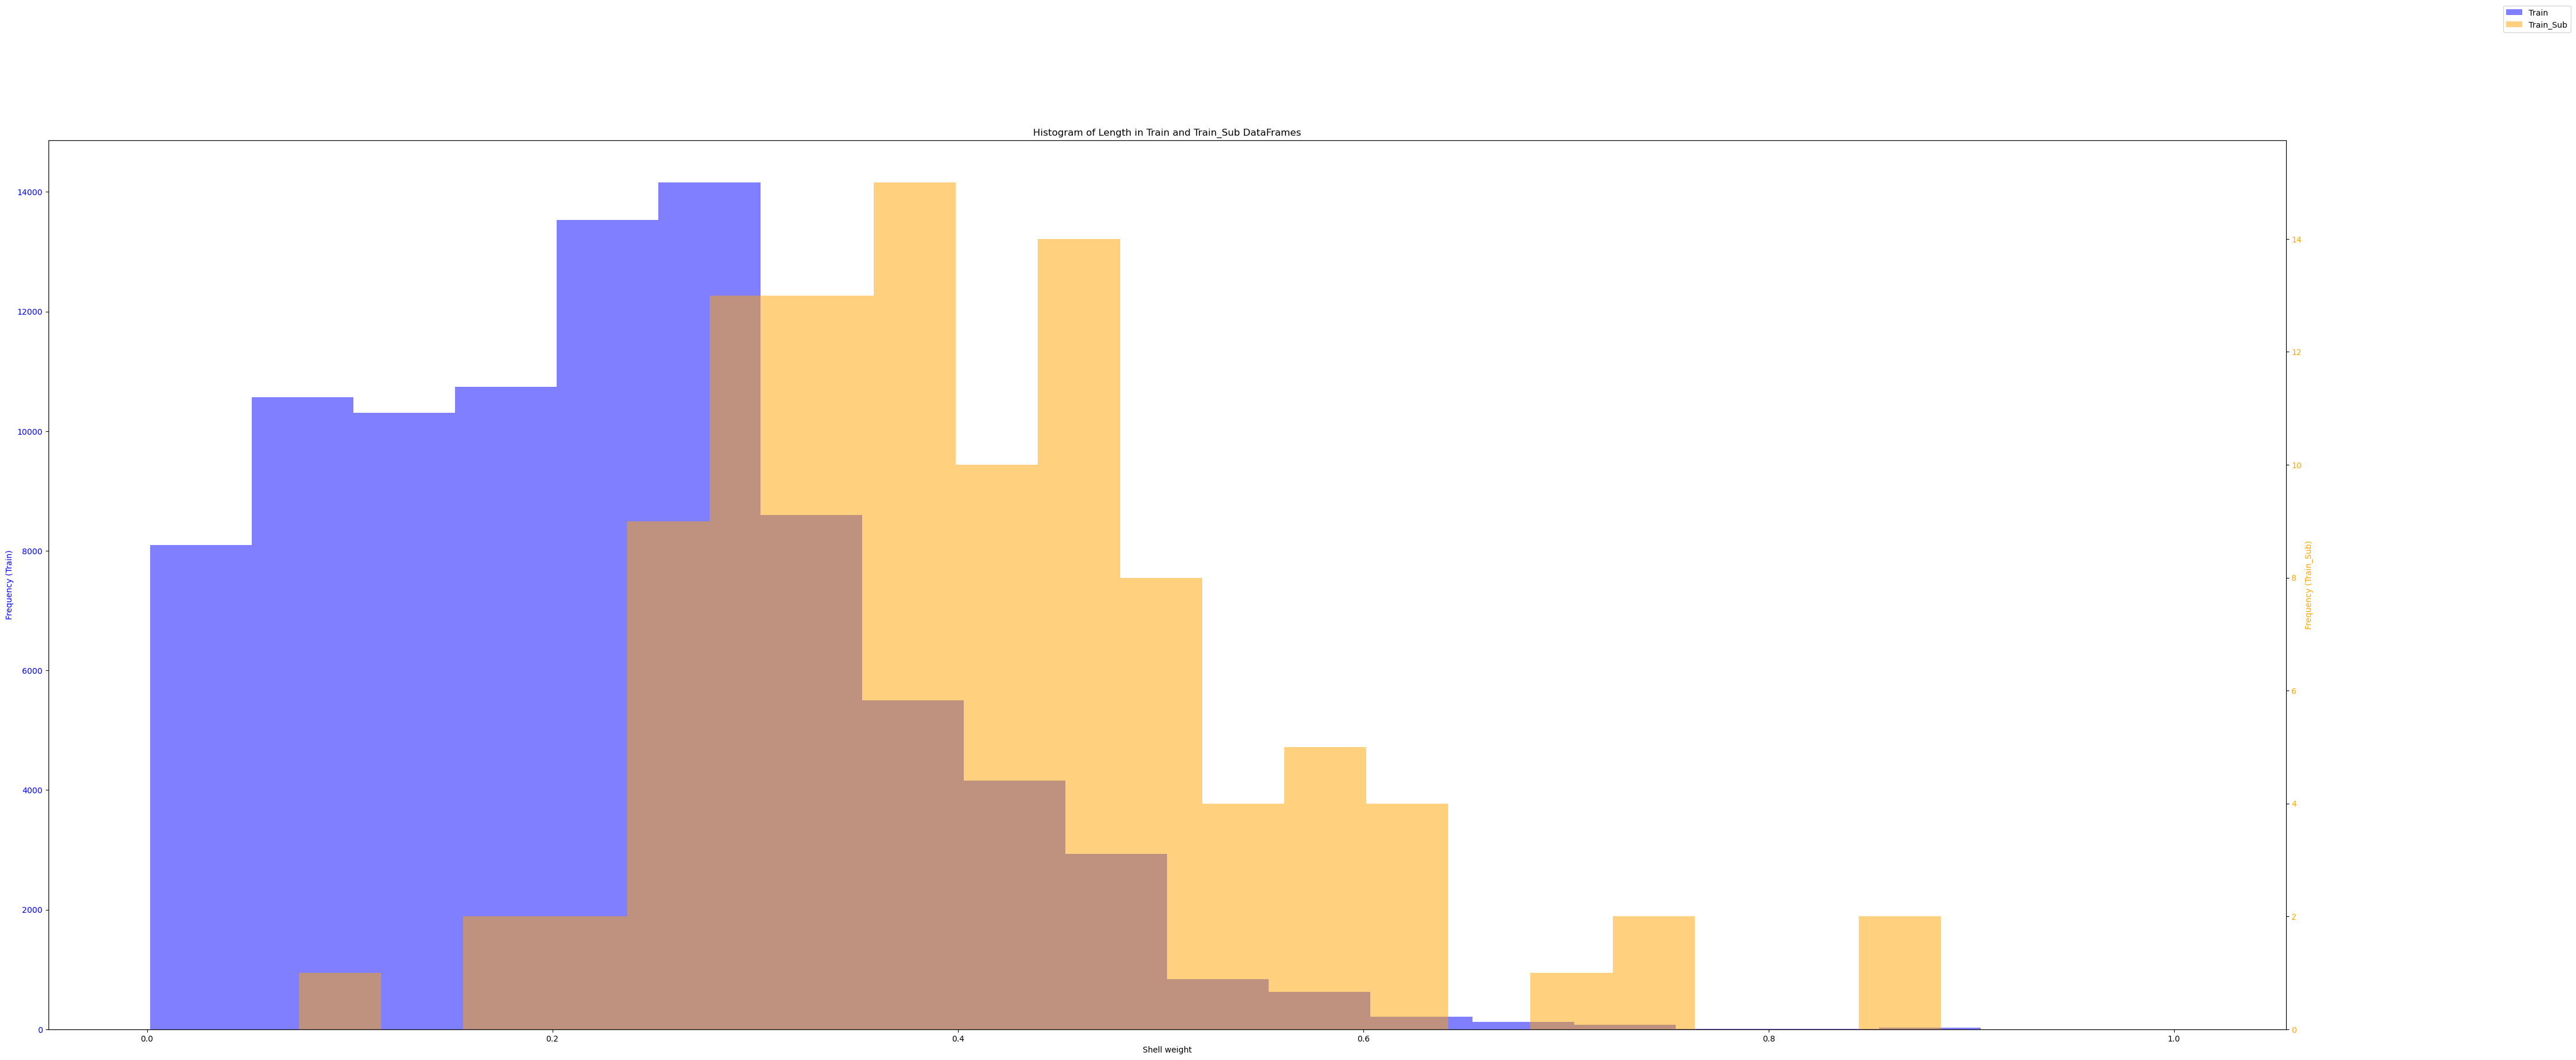

In [138]:
fig, ax1 = plt.subplots()
train_1 = train[train.Rings<25]
# Plot the histogram for the 'Length' column in 'train'
ax1.hist(train_1['Shell weight'], bins=20, color='blue', alpha=0.5, label='Train')
ax1.set_xlabel('Shell weight')
ax1.set_ylabel('Frequency (Train)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis
ax2 = ax1.twinx()

# Plot the histogram for the 'Length' column in 'train_sub'
ax2.hist(train_sub['Shell weight'], bins=20, color='orange', alpha=0.5, label='Train_Sub')
ax2.set_ylabel('Frequency (Train_Sub)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legend
plt.title('Histogram of Length in Train and Train_Sub DataFrames')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()